### Check Corona Vaccinations 
version 0.1

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) 

* read the data on [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data)
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-26 00:37:30.879867


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountries = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url
2,Bahrain,2020-12-25,Sinopharm,50543,https://twitter.com/MOH_Bahrain/status/1342560...
29,United Kingdom,2020-12-24,Pfizer/BioNTech,800000,https://www.gov.uk/government/speeches/prime-m...
20,Israel,2020-12-24,Pfizer/BioNTech,208600,https://www.gov.il/he/departments/news/2512202...
1,Bahrain,2020-12-24,Sinopharm,50071,https://twitter.com/MOH_Bahrain/status/1342189...
13,Canada,2020-12-24,Pfizer/BioNTech,43525,https://github.com/ishaberry/Covid19Canada/blo...
0,Bahrain,2020-12-23,Sinopharm,38965,https://twitter.com/MOH_Bahrain/status/1341855...
30,United States,2020-12-23,"Moderna, Pfizer/BioNTech",1008025,https://covid.cdc.gov/covid-data-tracker/#vacc...
19,Israel,2020-12-23,Pfizer/BioNTech,134500,https://www.gov.il/he/departments/news/2512202...
12,Canada,2020-12-23,Pfizer/BioNTech,35204,https://github.com/ishaberry/Covid19Canada/blo...
11,Canada,2020-12-22,Pfizer/BioNTech,26287,https://github.com/ishaberry/Covid19Canada/blo...


In [4]:
#Countries in list
allCountries["location"].value_counts()

Canada              11
Israel               5
United States        4
Russia               3
Bahrain              3
Scotland             2
Wales                2
United Kingdom       2
Northern Ireland     2
China                1
England              1
Name: location, dtype: int64

In [5]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Bahrain           Sinopharm                    3
Canada            Pfizer/BioNTech             11
China             CNBG, Sinovac                1
England           Pfizer/BioNTech              1
Israel            Pfizer/BioNTech              5
Northern Ireland  Pfizer/BioNTech              2
Russia            Sputnik V                    3
Scotland          Pfizer/BioNTech              2
United Kingdom    Pfizer/BioNTech              2
United States     Moderna, Pfizer/BioNTech     4
Wales             Pfizer/BioNTech              2
dtype: int64

In [6]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 33
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            29 non-null     object        
 1   date                29 non-null     datetime64[ns]
 2   vaccine             29 non-null     object        
 3   total_vaccinations  29 non-null     int64         
 4   source_url          29 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.4+ KB


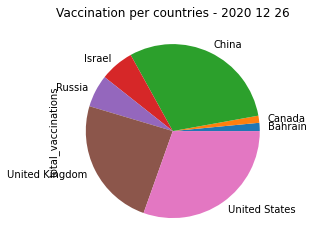

In [7]:
#Countries
%matplotlib inline    
import matplotlib.pyplot as plt   

#Reported numbers are accumulated --> get latest
plotCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine']].groupby('location').apply(lambda x: x.head(1))
plotCountries = plotCountries.set_index('location')
plotCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperCountry.png')  
plt.show() 


In [8]:
plotCountries.sort_values(by='total_vaccinations',ascending=True)

,total_vaccinations,vaccine
location,,
Canada,43525,Pfizer/BioNTech
Bahrain,50543,Sinopharm
Russia,200000,Sputnik V
Israel,208600,Pfizer/BioNTech
United Kingdom,800000,Pfizer/BioNTech
China,1000000,"CNBG, Sinovac"
United States,1008025,"Moderna, Pfizer/BioNTech"


In [9]:
plotCountries.sum()

total_vaccinations                                              3310693
vaccine               SinopharmPfizer/BioNTechCNBG, SinovacPfizer/Bi...
dtype: object

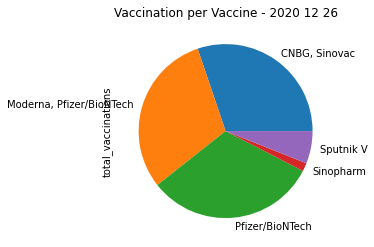

In [10]:
# Vaccine numbers
plotVaccine = plotCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperVaccine.png')  
plt.show()

In [11]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinopharm                     50543
Sputnik V                    200000
CNBG, Sinovac               1000000
Moderna, Pfizer/BioNTech    1008025
Pfizer/BioNTech             1052125
Name: total_vaccinations, dtype: int64

In [12]:
# Sweden have 10 000 doses....

In [13]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-26 00:37:34.464434
Time elapsed (hh:mm:ss.ms) 0:00:03.584896


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)